In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
sns.set_style("darkgrid")
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('D:\\Disco C.2\\SOYHENRY\\Mis Proyectos El Mayki\\Proyecto_Integrador_M6\\ProyectoHospitalizacion\\2. EDA\\Hospitalizacion_nt.csv')
df.head()

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTÁTICO,ANTIBIÓTICO UTILIZADO EN LA PROFILAXIS,NÚMERO DE MUESTRAS TOMADAS,BIOPSIA,FIEBRE,HOSPITALIZACIÓN
0,53,0,4.0,0,1,1,12,7,1,1
1,56,0,7.7,0,1,1,12,7,1,1
2,57,0,29.0,1,1,1,24,7,1,1
3,56,0,7.0,0,1,1,12,7,1,1
4,55,0,29.0,1,1,1,24,7,1,1


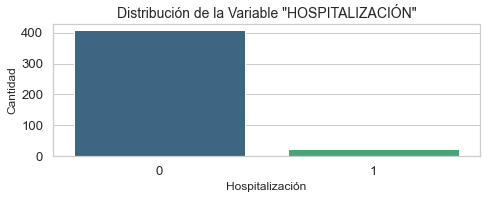

In [3]:
# Crear el countplot vertical
plt.figure(figsize=(7, 3))
sns.set(style="whitegrid", font_scale=1.2)

sns.countplot(data=df, x='HOSPITALIZACIÓN', palette='viridis')

# Añadir etiquetas y título
plt.title('Distribución de la Variable "HOSPITALIZACIÓN"', fontsize=14)
plt.xlabel('Hospitalización', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
# Se definen X e y (variables predictoras y variable objetivo)
X = df.drop('HOSPITALIZACIÓN', axis=1)
y = df['HOSPITALIZACIÓN']

# Se divide el conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Información sobre las etiquetas en el conjunto de entrenamiento
print(f'Número de instancias clasificadas como NO en el conjunto de entrenamiento: {y_train.value_counts()[0]}')
print(f'Número de instancias clasificadas como SI en el conjunto de entrenamiento: {y_train.value_counts()[1]}')

# Detalles sobre las etiquetas en el conjunto de prueba
print(f'Cantidad de instancias clasificadas como NO en el conjunto de prueba: {y_test.value_counts()[0]}')
print(f'Cantidad de instancias clasificadas como SI en el conjunto de prueba: {y_test.value_counts()[1]}')

Número de instancias clasificadas como NO en el conjunto de entrenamiento: 285
Número de instancias clasificadas como SI en el conjunto de entrenamiento: 16
Cantidad de instancias clasificadas como NO en el conjunto de prueba: 123
Cantidad de instancias clasificadas como SI en el conjunto de prueba: 7


In [5]:
# Se crea una instancia de RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Se aplica el sobremuestreo a los datos de entrenamiento
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Información sobre las etiquetas después del sobremuestreo en el conjunto de entrenamiento
print(f'Instancias clasificadas como NO después de sobremuestreo en el conjunto de entrenamiento: {y_train_ros.value_counts()[0]}')
print(f'Instancias clasificadas como SI después de sobremuestreo en el conjunto de entrenamiento: {y_train_ros.value_counts()[1]}')

Instancias clasificadas como NO después de sobremuestreo en el conjunto de entrenamiento: 285
Instancias clasificadas como SI después de sobremuestreo en el conjunto de entrenamiento: 285


In [6]:
# Define el rango de hiperparámetros para KNN el GridSearch
param_grid_knn = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size':[1,3,5,7,10],
    'algorithm':['auto', 'kd_tree']
}

# Define el rango de hiperparámetros para tre el GridSearch
param_grid_tree = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 20)
}

# Define el rango de hiperparámetros para SVC el GridSearch
param_grid_SVC = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

In [7]:
## Se crea una lista para almacenar los resultados de diferentes modelos
results = []

# Parámetros para Grid Search en KNN
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Parámetros para Grid Search en Decision Tree
param_grid_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Parámetros para Grid Search en SVC
param_grid_SVC = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Se instancia y evalua el modelo K-NN
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train_ros, y_train_ros)

best_knn_estimator = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

y_pred_test_knn = best_knn_estimator.predict(X_test)
y_pred_train_knn = best_knn_estimator.predict(X_train_ros)

cm_train_knn = confusion_matrix(y_train_ros, y_pred_train_knn)
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)

train_accuracy_knn = accuracy_score(y_train_ros, y_pred_train_knn)
train_precision_knn = precision_score(y_train_ros, y_pred_train_knn)
train_recall_knn = recall_score(y_train_ros, y_pred_train_knn)
train_f1_knn = f1_score(y_train_ros, y_pred_train_knn)

test_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
test_precision_knn = precision_score(y_test, y_pred_test_knn)
test_recall_knn = recall_score(y_test, y_pred_test_knn)
test_f1_knn = f1_score(y_test, y_pred_test_knn)

knn_metrics = {
    'Train Accuracy': train_accuracy_knn,
    'Train Precision': train_precision_knn,
    'Train Recall': train_recall_knn,
    'Train F1': train_f1_knn,
    'Test Accuracy': test_accuracy_knn,
    'Test Precision': test_precision_knn,
    'Test Recall': test_recall_knn,
    'Test F1': test_f1_knn,
}

results.append(('KNN', knn_metrics))

# Instanciar y evaluar el modelo Decision Tree
tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid_tree, cv=5)
grid_search_tree.fit(X_train_ros, y_train_ros)

best_tree_estimator = grid_search_tree.best_estimator_
best_tree_params = grid_search_tree.best_params_

y_pred_test_tree = best_tree_estimator.predict(X_test)
y_pred_train_tree = best_tree_estimator.predict(X_train_ros)

cm_train_tree = confusion_matrix(y_train_ros, y_pred_train_tree)
cm_test_tree = confusion_matrix(y_test, y_pred_test_tree)

train_accuracy_tree = accuracy_score(y_train_ros, y_pred_train_tree)
train_precision_tree = precision_score(y_train_ros, y_pred_train_tree)
train_recall_tree = recall_score(y_train_ros, y_pred_train_tree)
train_f1_tree = f1_score(y_train_ros, y_pred_train_tree)

test_accuracy_tree = accuracy_score(y_test, y_pred_test_tree)
test_precision_tree = precision_score(y_test, y_pred_test_tree)
test_recall_tree = recall_score(y_test, y_pred_test_tree)
test_f1_tree = f1_score(y_test, y_pred_test_tree)

tree_metrics = {
    'Train Accuracy': train_accuracy_tree,
    'Train Precision': train_precision_tree,
    'Train Recall': train_recall_tree,
    'Train F1': train_f1_tree,
    'Test Accuracy': test_accuracy_tree,
    'Test Precision': test_precision_tree,
    'Test Recall': test_recall_tree,
    'Test F1': test_f1_tree,
}

results.append(('Decision Tree', tree_metrics))

# Instanciar y evaluar el modelo SVC
svc = SVC(probability=True)
grid_search_SVC = GridSearchCV(estimator=svc, param_grid=param_grid_SVC, cv=5)
grid_search_SVC.fit(X_train_ros, y_train_ros)

best_svc_estimator = grid_search_SVC.best_estimator_
best_svc_params = grid_search_SVC.best_params_

y_pred_test_svc = best_svc_estimator.predict(X_test)
y_pred_train_svc = best_svc_estimator.predict(X_train_ros)

cm_train_svc = confusion_matrix(y_train_ros, y_pred_train_svc)
cm_test_svc = confusion_matrix(y_test, y_pred_test_svc)

train_accuracy_svc = accuracy_score(y_train_ros, y_pred_train_svc)
train_precision_svc = precision_score(y_train_ros, y_pred_train_svc)
train_recall_svc = recall_score(y_train_ros, y_pred_train_svc)
train_f1_svc = f1_score(y_train_ros, y_pred_train_svc)

test_accuracy_svc = accuracy_score(y_test, y_pred_test_svc)
test_precision_svc = precision_score(y_test, y_pred_test_svc)
test_recall_svc = recall_score(y_test, y_pred_test_svc)
test_f1_svc = f1_score(y_test, y_pred_test_svc)

svc_metrics = {
    'Train Accuracy': train_accuracy_svc,
    'Train Precision': train_precision_svc,
    'Train Recall': train_recall_svc,
    'Train F1': train_f1_svc,
    'Test Accuracy': test_accuracy_svc,
    'Test Precision': test_precision_svc,
    'Test Recall': test_recall_svc,
    'Test F1': test_f1_svc,
}

results.append(('SVC', svc_metrics))



In [8]:
def sum_results_est(results):
    '''
    Devuelve un resumen de las métricas a partir de un diccionario que contiene el resumen.
    '''
    # Convertir la lista de resultados en un DataFrame
    data = []

    for model_name, metrics in results:
        metrics['Model'] = model_name
        data.append(metrics)

    df_summary = pd.DataFrame(data)

    # Reordenar las columnas para tener un formato más legible
    columns = ['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']
    df_summary = df_summary[columns]
    return df_summary

# Luego, puedes utilizarla con tu lista de resultados
results_sum = sum_results_est(results)
results_sum

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,KNN,1.0,1.0,1.0,1.0,0.969231,0.8,0.571429,0.666667
1,Decision Tree,1.0,1.0,1.0,1.0,0.969231,0.8,0.571429,0.666667
2,SVC,1.0,1.0,1.0,1.0,0.976923,1.0,0.571429,0.727273


In [9]:
# Se presentan los mejores parámetros para cada modelo
print('PARÁMETROS DE LOS MEJORES MODELOS')
print('KNN:', best_knn_params)
print('Decision Tree:', best_tree_params)
print('SVC:', best_svc_params)

PARÁMETROS DE LOS MEJORES MODELOS
KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


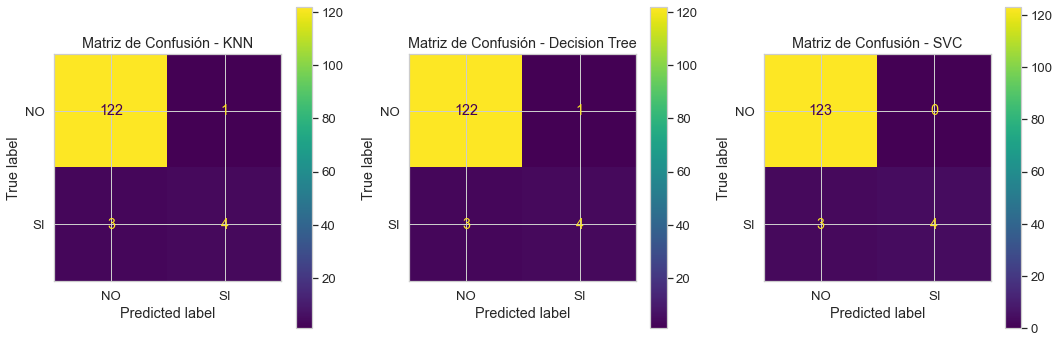

In [10]:
# Se visualizan las tres matrices de confusión
matrices = [cm_test_knn, cm_test_tree, cm_test_svc]
modelos = ['KNN', 'Decision Tree', 'SVC']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, m in enumerate(matrices):
    ax = axes[i]
    cm_display = ConfusionMatrixDisplay(m, display_labels=['NO', 'SI'])
    cm_display.plot(ax=ax)
    ax.set_title(f'Matriz de Confusión - {modelos[i]}')

plt.tight_layout()
plt.show()

In [11]:
# Se estandarizan los datos antes de aplicar PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Se define un diccionario para almacenar resultados
results = {}

# Se definen los números de componentes principales
num_components = [3, 5, 7, 9]

for n in num_components:
    
    # Se aplica PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Se define y entrena el modelo KNN
    knn = KNeighborsClassifier()
    param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
    grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
    grid_search_knn.fit(X_train_pca, y_train_ros)
    
    best_knn = grid_search_knn.best_estimator_
    knn_pred_train = best_knn.predict(X_train_pca)
    knn_pred_test = best_knn.predict(X_test_pca)
    knn_best_params = grid_search_knn.best_params_

    # Se define y entrena el modelo Decision Tree
    tree = DecisionTreeClassifier()
    param_grid_tree = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5)
    grid_search_tree.fit(X_train_pca, y_train_ros)

    best_tree = grid_search_tree.best_estimator_
    tree_pred_train = best_tree.predict(X_train_pca)
    tree_pred_test = best_tree.predict(X_test_pca)
    tree_best_params = grid_search_tree.best_params_

    # Se define y entrena el modelo SVC
    svc = SVC(probability=True)
    param_grid_SVC = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    grid_search_svc = GridSearchCV(svc, param_grid_SVC, cv=5)
    grid_search_svc.fit(X_train_pca, y_train_ros)

    best_svc = grid_search_svc.best_estimator_
    svc_pred_train = best_svc.predict(X_train_pca)
    svc_pred_test = best_svc.predict(X_test_pca)
    svc_best_params = grid_search_svc.best_params_

    # Se almacenan los resultados en el diccionario
    results[n] = {
        'KNN': (knn_pred_train, knn_pred_test, best_knn),
        'Tree': (tree_pred_train, tree_pred_test, best_tree),
        'SVC': (svc_pred_train, svc_pred_test, best_svc)
    }


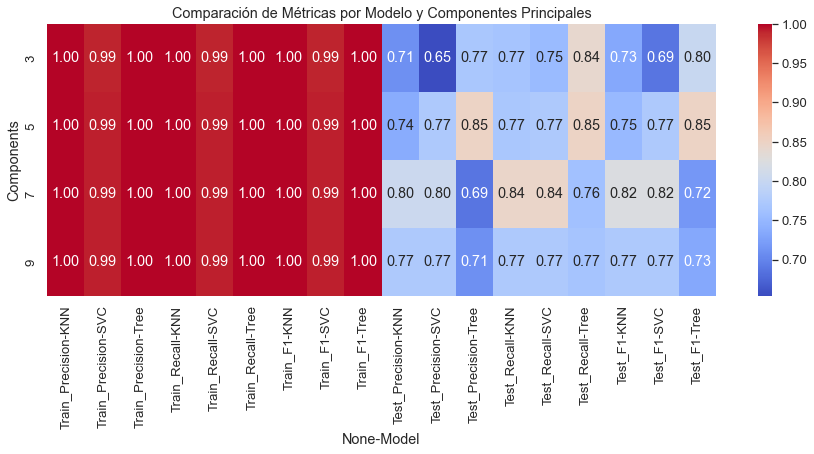

In [13]:
# Crear una lista de diccionarios para almacenar los resultados
summary_results = []

for n, models in results.items():
    for model_name, (y_train_pred, y_test_pred, best_model) in models.items():
        report_train = classification_report(y_train_ros, y_train_pred, output_dict=True)
        report_test = classification_report(y_test, y_test_pred, output_dict=True)

        summary_results.append({
            'Components': n,
            'Model': model_name,
            'Train_Precision': report_train["macro avg"]["precision"],
            'Train_Recall': report_train["macro avg"]["recall"],
            'Train_F1': report_train["macro avg"]["f1-score"],
            'Test_Precision': report_test["macro avg"]["precision"],
            'Test_Recall': report_test["macro avg"]["recall"],
            'Test_F1': report_test["macro avg"]["f1-score"]
        })

# Crear un DataFrame a partir de la lista de resultados
df_summary = pd.DataFrame(summary_results)

# Reorganizar el DataFrame para tener una columna para cada métrica
df_summary_metrics = df_summary.pivot(index='Components', columns='Model')

# Elegir las métricas que deseas visualizar (por ejemplo, precisión, recall, F1-score)
metrics_to_show = ['Train_Precision', 'Train_Recall', 'Train_F1', 'Test_Precision', 'Test_Recall', 'Test_F1']
df_metrics_to_show = df_summary_metrics[metrics_to_show]

# Crear un heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(df_metrics_to_show, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Comparación de Métricas por Modelo y Componentes Principales')
plt.show()


In [18]:
from sklearn.metrics import roc_auc_score

Roc_Auc=roc_auc_score(y_test,y_pred_test_knn)#tree,svc

print(Roc_Auc)

0.7816492450638791


In [20]:
from sklearn.metrics import roc_auc_score

Roc_Auc=roc_auc_score(y_test,y_pred_test_tree)#tree,svc

print(Roc_Auc)

0.7816492450638791


In [19]:
from sklearn.metrics import roc_auc_score

Roc_Auc=roc_auc_score(y_test,y_pred_test_svc)#tree,svc

print(Roc_Auc)

0.7857142857142857


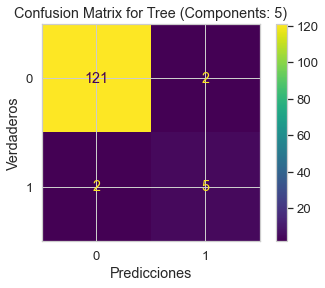

In [14]:
# Encuentra el mejor modelo y métrica en el resumen
best_model_info = df_summary[df_summary['Test_F1'] == df_summary['Test_F1'].max()].iloc[0]

# Obtener información del mejor modelo
best_components = best_model_info['Components']
best_model_name = best_model_info['Model']

# Obtener predicciones del mejor modelo
best_model_preds = results[best_components][best_model_name][1]

# Obtener matriz de confusión
conf_matrix = confusion_matrix(y_test, best_model_preds)

# Crear una visualización de la matriz de confusión
cm_display = ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title(f'Confusion Matrix for {best_model_name} (Components: {best_components})')
plt.show()


In [15]:
# Se presentan los mejores parámetros para cada modelo
print('PARÁMETROS DE LOS MEJORES MODELOS')
print('KNN:', knn_best_params)
print('Decision Tree:', tree_best_params)
print('SCV:', svc_best_params)

PARÁMETROS DE LOS MEJORES MODELOS
KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Decision Tree: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2}
SCV: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Se ha intentado mejorar el modelo pero por la falta de datos y el desvalance, no nos ayuda para poder tener un buen modelo bien entrenado. No queda solicitar mas datos para poder realizar un modelo bueno.